In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
from decimal import *
import pandas as pd

In [2]:
import threading
import numpy as np
import datetime

In [3]:
import itertools

In [4]:
number_of_nodes = 15

In [5]:
def calcImportance_pre(stake):

    # get total stake per node
    stakePerNode = [(sum(e)) for e in stake]

    totalStake = sum(stakePerNode)

    n = len(stake)
    weight = [0] * n
    importance = [0] * n
    for x in range(n):
        for y in range(n):
            # weight of a node is 0 if its stake is equal to 0
            #weight(channel) = sqrt(balance(channel) / stake(channel.source) * stake(channel.destination))
            weight[y] += 0 if stakePerNode[y]==0 else numpy.sqrt(stake[y][x]/stakePerNode[y] * stakePerNode[x])

    #print("Weighted downstream stake per node p(n) = ", weight)
    importanceList = numpy.array(weight) * numpy.array(stakePerNode)
    return importanceList;

def setupStake(
        # Number of nodes in the network. This number can be changed to test with small and large network size
        numNodes= number_of_nodes,
        # the minimum number of channels a node can open
        minChannelsPerNode=2,
        # the maximum number of channels a node can open 
        maxChannelsPerNode=10,
        minFundsPerNode=10,
        maxFundsPerNode=100,
        tokensPerTicket=0.1
    ):

    stake = [[0 for i in range(numNodes)] for j in range(numNodes)]
    listStakePerChannel = []
    avg_stake_list = []
    index_list = []
    for x in range(numNodes-3):
        # each node is given a random funding amount
        myFunds = numpy.random.rand() * (maxFundsPerNode - minFundsPerNode) + minFundsPerNode

        # get random number of channels per node
        myChannels = int(numpy.random.rand() * (maxChannelsPerNode - minChannelsPerNode + 1) + minChannelsPerNode)

        # This value represents the amount each node stakes in their channel
        # It is computed as the number of funds a node has divided by number of channels they open
        stakePerChannel = myFunds / myChannels
        stakePerChannel = int(stakePerChannel / tokensPerTicket) * tokensPerTicket
        
        # Creats a list of stakePerChannel
        listStakePerChannel.append(stakePerChannel)

        # Identifying the maximum stake
        maxListStakePerChannel = max(listStakePerChannel)
        
        # Identifying the "position" of the stake - which node initiated 
        index = listStakePerChannel.index(maxListStakePerChannel)
        index_list.append(index)
        index_max = max(index_list)

        # fund channels by writing into stake matrix
        for c in range(myChannels):
            # TODO: this does not prevent a node from opening a channel to the same counterparty multiple times
            counterparty = int(numpy.random.rand() * (numNodes - 4))

            # cannot open channel to self - keep diagonal of matrix at 0
            if counterparty >= x:
                counterparty = counterparty + 1
            stake[x][counterparty] = stakePerChannel
        
        sum_stake = sum([sum(stake[li]) for li in range(numNodes-3)])
        avg_stake = sum_stake/(numNodes-3)
        
        #importance_score = calcImportance_pre(stake)
       
    #calculating imporance score
    #importance_max = max(importance_score)
    #index_of_importance = numpy.where(importance_score == importance_max)
    #importance_max = index_of_importance[0][0] 
        
    #non_random node 1, strategy: spreading the stakes equally between the channels
    for b in range(numNodes-3):
        stake[numNodes-3][b] = avg_stake/(numNodes-3)
        
    #non_random node 2, strategy: spreading the stakes between the channels based on their proportionate share of the sum of stakes
    for r in range(numNodes-3):
        stake[numNodes-2][r] = sum(stake[r])/sum_stake*avg_stake
    
    stake = [[Decimal(i) for i in j] for j in stake]
    
    return stake

In [6]:
initial_stake = setupStake()
initial_stake

[[Decimal('0'),
  Decimal('0'),
  Decimal('8.0999999999999996447286321199499070644378662109375'),
  Decimal('8.0999999999999996447286321199499070644378662109375'),
  Decimal('0'),
  Decimal('0'),
  Decimal('8.0999999999999996447286321199499070644378662109375'),
  Decimal('8.0999999999999996447286321199499070644378662109375'),
  Decimal('0'),
  Decimal('0'),
  Decimal('8.0999999999999996447286321199499070644378662109375'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0')],
 [Decimal('8.5'),
  Decimal('0'),
  Decimal('8.5'),
  Decimal('0'),
  Decimal('0'),
  Decimal('8.5'),
  Decimal('8.5'),
  Decimal('0'),
  Decimal('8.5'),
  Decimal('8.5'),
  Decimal('0'),
  Decimal('8.5'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0')],
 [Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('16'),
  Decimal('16'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('16'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0')],
 [Decimal(

In [7]:
def calcImportance(stake):

    # get total stake per node
    stakePerNode = [Decimal(sum(e)) for e in stake]

    totalStake = sum(stakePerNode)

    n = len(stake)
    weight = [0] * n
    importance = [0] * n
    for x in range(n):
        for y in range(n):
            # weight of a node is 0 if its stake is equal to 0
            #weight(channel) = sqrt(balance(channel) / stake(channel.source) * stake(channel.destination))
            weight[y] += 0 if stakePerNode[y]==0 else numpy.sqrt(stake[y][x]/stakePerNode[y] * stakePerNode[x])

    #print("Weighted downstream stake per node p(n) = ", weight)
    importanceList = numpy.array(weight) * numpy.array(stakePerNode)
    return importanceList;

In [8]:
initial_importance = calcImportance(initial_stake)
initial_importance

array([Decimal('462.1952028217797105733469980'),
       Decimal('1026.422945211930691842701230'),
       Decimal('601.1137723829953309265607024'),
       Decimal('227.4924502905437784093001632'),
       Decimal('855.5994216260714301250495128'),
       Decimal('659.8172848379046904050851525'),
       Decimal('287.0944126880592679376116928'),
       Decimal('167.4127199323718586376904401'),
       Decimal('193.5575716583016784694344602'),
       Decimal('509.3626057197548689851529919'),
       Decimal('242.4407790478712054588167590'),
       Decimal('608.1011415982589259687136726'),
       Decimal('842.5733060062623834824405594'),
       Decimal('871.7045748887317368727700763'), Decimal('0')],
      dtype=object)

In [9]:
def selectChannel(weights, weightIndexToNodeLUT):
    """
    Randomly selects a counterparty based on weights according to a LUT
    Returns the node id (or -1 if none could be found)
    Parameters
    ----------
    weights: a list of weights to be used for normalizing the random selection
    weightIndexToNodeLUT: a LUT translating the weights list to node ids
    """
    rand = numpy.random.rand()
    totalWeight = sum(weights)
    sumWeights = 0
    counterparty = -1
    for i in enumerate(weights):
        sumWeights += i[1]
        if totalWeight == 0:
           sumWeights = 0
        else:
            if sumWeights / totalWeight >= rand:
               counterparty = weightIndexToNodeLUT[i[0]]
               break;
    return counterparty

In [10]:
def randomPickWeightedByImportance(importance):
    channel = selectChannel(importance, [i for i in range(len(importance))])
    return channel

In [11]:
def selectChannel(weights, weightIndexToNodeLUT):
    """
    Randomly selects a counterparty based on weights according to a LUT
    Returns the node id (or -1 if none could be found)
    Parameters
    ----------
    weights: a list of weights to be used for normalizing the random selection
    weightIndexToNodeLUT: a LUT translating the weights list to node ids
    """
    rand = numpy.random.rand()
    totalWeight = sum(weights)
    sumWeights = 0
    counterparty = -1
    for i in enumerate(weights):
        sumWeights += i[1]
        if totalWeight == 0:
           sumWeights = 0
        else:
            if sumWeights / totalWeight >= rand:
               counterparty = weightIndexToNodeLUT[i[0]]
               break;
    return counterparty;

def randomPickWeightedByImportance(importance):
    channel = selectChannel(importance, [i for i in range(len(importance))])
    return channel;

def openChannels(stake, importance):
        #print("opening channels")
        numOpenChannels = 0
        channelcount = 1
        ctn = number_of_nodes-1
        openchannelid = [ctn]
        tokensPerChannel = 10
        # add own id to avoid self-staking
        while (numOpenChannels < channelcount):

            # do not open channels to same counterparty multiple times
            tmpImportance = list(importance)
            for i in range(len(importance)):
                if i in openchannelid:
                    tmpImportance[i] = 0

            newChannel = randomPickWeightedByImportance(tmpImportance)
            
            if (newChannel == -1):
                print("ERROR: could not find a counterparty to open the channel to!")
                # TODO: here we should try again but this time including 0 importance nodes
            else:
                #print("opening channel to node ", newChannel)
                stake[ctn][newChannel] = stake[ctn][newChannel] + 10
                openchannelid.append(newChannel)
            # if opening channels didn't work we still want this loop to terminate
            numOpenChannels = numOpenChannels + 1
        
        return openchannelid

In [12]:
 def sendPacket(stake, importance):
        #print("sending packet")

        # persist importance list between attempts so that dead ends can be removed
        importanceAttempts = importance.copy()
        attemptsPerTick = 10
        hops = 3
        numPlayers = 4
        ctNodeId = number_of_nodes-1

        for a in range(attemptsPerTick):
            nextNodeIndex = ctNodeId
            pathIndices = [nextNodeIndex]

            # try to find a path
            for j in range(hops):
                # reset importance
                importanceTmp = importanceAttempts.copy()
                #hoprsim.printArray1d(importanceTmp, 1)

                # remove importance entries for nodes to which current hop has no open channels
                # this is used in the path selection for the next hop
                for i in range(numPlayers):
                    if stake[nextNodeIndex][i] == 0 :
                        importanceTmp[i] = 0

                # prevent loops in path by removing existing nodes on path from list
                for i in pathIndices:
                    importanceTmp[i] = 0

                #hoprsim.printArray1d(importanceTmp, 1)
                nextNodeIndex = randomPickWeightedByImportance(importanceTmp)
                if nextNodeIndex == -1:
                    break # stop looking for path if no next node could be found
                pathIndices.append(nextNodeIndex)

            #print("Found path: ", pathIndices)
            return pathIndices
            # then facilitate they payout to each node
            # but only as long as the edge is valid (new earnings + existing earnings <= counter party stake)

In [13]:
def number_of_openings(stake, importance):    
    opening_count = []
    opening_list = []
    sending_count = []
    sending_list = []
    
    for _ in range(100):
        #running the openChannel function 1000 times 
        #creating a list from the outputs
        opening_channel_to = openChannels(stake, importance)
        opening_count.append(opening_channel_to)
        sending_packet_to = sendPacket(stake, importance)
        sending_count.append(sending_packet_to)
    
    #orginizing the list in a dataframe - where each opening/sending position refers to a column 
    opening_pd = pd.DataFrame(opening_count)
    sending_pd = pd.DataFrame(sending_count)

    #summing up the opening appearance by node
    for h in range(len(opening_pd.columns)):
        #counting the value by opening positions (e.g. - how many times showep up the given node as the first node of openings)
        openings = opening_pd[h].value_counts()
        opening_list.append(openings)
    #organizing the list in a new dataframe
    opening_list = pd.concat(opening_list).to_frame().reset_index()
    opening_list.columns = ['node_opening_to', 'sum_opening']
      
      #summing up the sending appearance by node
    for k in range(len(sending_pd.columns)):
        #counting the value by opening positions (e.g. - how many times showep up the given node as the first node of openings)
        sendings = sending_pd[k].value_counts()
        sending_list.append(sendings)
    #organizing the list in a new dataframe
    sending_list = pd.concat(sending_list).to_frame().reset_index()
    sending_list.columns = ['node_sending_to', 'sum_sending']
    
    
    #summing up by nodes
    opening_list = opening_list.groupby(['node_opening_to']).sum()
    sending_list = sending_list.groupby(['node_sending_to']).sum()
    stake_ct = stake[number_of_nodes-1]
    
    output = pd.concat([opening_list, sending_list], axis=1)
    output['stake'] = stake_ct
    
    return output

In [14]:
iteration_list = []
total_stake_pernode = []

def iteration_plot_random():
    for _ in range(10):
        # creating a new stake matrix and calculating it's importance
        ini_stake = setupStake()
        ini_importance = calcImportance(ini_stake)
        #calculating the sum of stakes per node 
        for p in range(len(ini_stake)):
            j = sum(ini_stake[p])
            total_stake_pernode.append(j)
            total_stake_pernode_df = pd.DataFrame(total_stake_pernode)
        #running the "number of openings" function
        output = number_of_openings(ini_stake, ini_importance)
        #creating a list from the iterations
        iteration_list.append(output)
        iteration_list_df = pd.concat(iteration_list)
        iteration_list_df = iteration_list_df.reset_index(drop=False)
    
    #merging the sum of the stakes and the ineration dataframe 
    iteration_output = pd.concat([iteration_list_df, total_stake_pernode_df], axis=1)
    iteration_output = iteration_output.rename(columns={'index': 'node_number', 0: 'total_stake_per_node'})
    return iteration_output


In [15]:
iteration_random = iteration_plot_random()
iteration_random

node_number  sum_opening  sum_sending stake  \
0              0          3.0         12.0    30   
1              1          6.0         10.0    60   
2              2          7.0         11.0    70   
3              3          3.0          9.0    30   
4              4          1.0          9.0    10   
..           ...          ...          ...   ...   
145           10         14.0         31.0   140   
146           11          9.0         28.0    90   
147           12         12.0         37.0   120   
148           13         12.0         38.0   120   
149           14        100.0        100.0     0   

              total_stake_per_node  
0    19.60000000000000142108547152  
1                               35  
2    47.40000000000000213162820728  
3    27.60000000000000319744231092  
4    23.60000000000000142108547152  
..                             ...  
145  77.60000000000000852651282912  
146                           70.5  
147  56.79166666666668206175927480  
148  56.79166666666667251384126303  
149                              0  

[150 rows x 5 columns]

In [16]:
#removing the CT node
df = iteration_random[iteration_random["node_number"] != number_of_nodes-1]
df.head(51)

node_number  sum_opening  sum_sending stake           total_stake_per_node
0             0          3.0         12.0    30  19.60000000000000142108547152
1             1          6.0         10.0    60                             35
2             2          7.0         11.0    70  47.40000000000000213162820728
3             3          3.0          9.0    30  27.60000000000000319744231092
4             4          1.0          9.0    10  23.60000000000000142108547152
5             5          5.0         19.0    50  41.70000000000000106581410364
6             6          9.0         28.0    90  62.00000000000000177635683940
7             7          1.0          6.0    10  11.40000000000000035527136788
8             8          7.0         27.0    70  66.60000000000000852651282912
9             9          8.0         28.0    80                           52.5
10           10          9.0         33.0    90  67.90000000000000746069872548
11           11         10.0         23.0   100  45.49999999999999822364316060
12           12         18.0         41.0   180  41.73333333333332895165312948
13           13         13.0         44.0   130  41.73333333333333350356753045
15            0         13.0         26.0   130                           85.5
16            1          7.0          7.0    70                           34.0
17            2          5.0         23.0    50  56.40000000000000213162820728
18            3         12.0         12.0   120  46.80000000000000426325641456
19            4          7.0         27.0    70  43.50000000000000532907051820
20            5          2.0          7.0    20  11.40000000000000079936057773
21            6          9.0         26.0    90  37.80000000000000426325641456
22            7          9.0         19.0    90  46.80000000000000426325641456
23            8          2.0         11.0    20  16.10000000000000186517468137
24            9          7.0         22.0    70  36.50000000000000355271367880
25           10          6.0         16.0    60  24.00000000000000355271367880
26           11          2.0         31.0    20  50.40000000000000213162820728
27           12          9.0         32.0    90  40.76666666666667104834687052
28           13         10.0         41.0   100  40.76666666666667049323535821
30            0          3.0         11.0    30  25.20000000000000062172489379
31            1          NaN          4.0     0  28.70000000000000284217094304
32            2          2.0          2.0    20  25.40000000000000213162820728
33            3          5.0         20.0    50  50.40000000000000213162820728
34            4         19.0         43.0   190  69.30000000000000248689957516
35            5          5.0         20.0    50  38.10000000000000319744231092
36            6         13.0         25.0   130  62.70000000000000639488462184
37            7          1.0          3.0    10  6.000000000000000888178419700
38            8          8.0         31.0    80  60.50000000000000710542735760
39            9          4.0          8.0    40                             20
40           10          2.0         21.0    20  39.50000000000000177635683940
41           11          7.0         29.0    70  41.00000000000000532907051820
42           12         14.0         42.0   140  38.90000000000000035527136788
43           13         17.0         41.0   170  38.89999999999999957811525064
45            0         11.0         28.0   110  87.60000000000000852651282912
46            1         10.0         27.0   100  79.20000000000000639488462184
47            2          4.0         16.0    40  49.50000000000000177635683940
48            3         10.0         20.0   100  70.79999999999999715782905696
49            4          4.0         15.0    40  31.80000000000000426325641456
50            5          6.0         23.0    60                             86
51            6          5.0         15.0    50  45.20000000000000284217094304
52            7         16.0         38.0   160  83.20

In [17]:
x = df['total_stake_per_node']
y = df['stake']

<function matplotlib.pyplot.show(*args, **kw)>

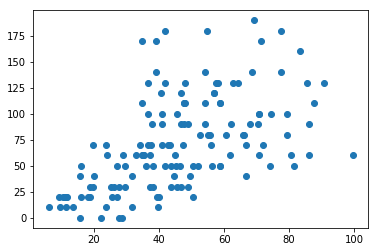

In [18]:
plt.scatter(x, y)
plt.show

In [28]:
from scipy.stats import pearsonr
import numpy as np

In [34]:
x = x.to_numpy()
y = y.to_numpy()

In [36]:
pearsonr(x, y)

TypeError: unsupported operand type(s) for -: 'float' and 'decimal.Decimal'

In [ ]:
numpy.random.rand()